<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Sarina Heshmati


In [4]:
student_number = '401105989'
full_name = 'Amirhosein Rezaei'
assert student_number and full_name is not None, 'please input your information'

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")

## Overview

In this assignment, you will explore a dataset containing information about employees and use that data to train models capable of predicting whether those employees have left the company (attrited) or not. You will start by exploring the dataset, analyzing its features, and performing necessary preprocessing steps (such as label encoding and scaling). Then, you will build and evaluate implementations of K-Nearest Neighbors (KNN) as well as Random Forest, Bagging, and AdaBoost classifiers. After training and tuning each model, you’ll compare their performance using metrics like accuracy and feature importance to identify the best approach for accurate attrition prediction.

# Load and Explore Dataset (10 points)

In [2]:
import pandas as pd

# Load the dataset
# "Attrition" is our target columm

df = pd.read_csv('dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


Explore the dataset and get familiar with its features and statistics. (don't worry about the 'masked values' in our target column. They are simply used to automatically test your model later on.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       902 non-null    int64 
 1   Attrition                 902 non-null    object
 2   BusinessTravel            902 non-null    object
 3   DailyRate                 902 non-null    int64 
 4   Department                902 non-null    object
 5   DistanceFromHome          902 non-null    int64 
 6   Education                 902 non-null    int64 
 7   EducationField            902 non-null    object
 8   EmployeeCount             902 non-null    int64 
 9   EmployeeNumber            902 non-null    int64 
 10  EnvironmentSatisfaction   902 non-null    int64 
 11  Gender                    902 non-null    object
 12  HourlyRate                902 non-null    int64 
 13  JobInvolvement            902 non-null    int64 
 14  JobLevel                  

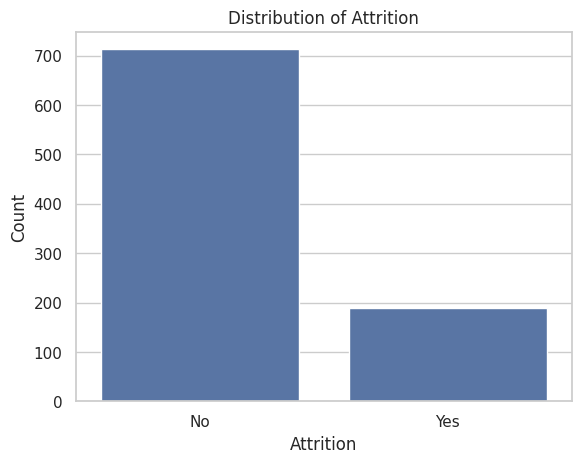

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


In [3]:
df.info()
df.describe()

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

target_counts = df['Attrition'].value_counts()
print(target_counts)
sns.countplot(data=df, x='Attrition')
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

df.head()

It is generally better to remove columns with only one unique value from a DataFrame when preparing data for a decision tree. <br>
Such columns do not provide any useful information for splitting the data and can lead to unnecessary complexity in the model. Remove the said columns from the DataFrame.

In [4]:
unique_values = df.nunique()
print(unique_values)
df = df.loc[:, unique_values >= 2]

Age                          42
Attrition                     2
BusinessTravel                3
DailyRate                   653
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeNumber              902
EnvironmentSatisfaction       4
Gender                        2
HourlyRate                   71
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome               853
MonthlyRate                 888
NumCompaniesWorked           10
Over18                        1
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
RelationshipSatisfaction      4
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
WorkLifeBalance               4
YearsAtC

Look at the DataFrame and try to gather insight into people's monthly income and things that generally affect this number.

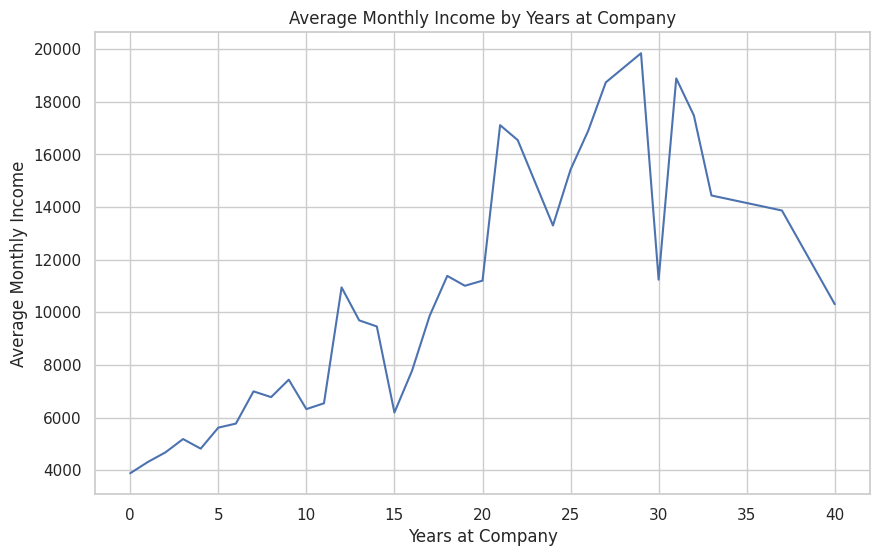

Highest Average Income: Sales = 6817.394366197183
Lowest Average Income: Research & Development = 6073.644444444444


In [5]:
avg_income_per_year = df.groupby('YearsAtCompany')['MonthlyIncome'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_income_per_year.index, y=avg_income_per_year.values)
plt.title("Average Monthly Income by Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Average Monthly Income")
plt.show()

income_by_department = df.groupby('Department')['MonthlyIncome'].mean()
print("Highest Average Income:", income_by_department.idxmax(), "=", income_by_department.max())
print("Lowest Average Income:", income_by_department.idxmin(), "=", income_by_department.min())

# Data Preprocessing (5 points)

Label Encode categorical columns and create a new DataFrame. Then split this data into train and test.

In [12]:
df_copy = df.copy()
label_encoders = {}

for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [13]:
# Split into features and target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbors (KNN) Model (15 points)

Implement KNN model from scratch.

In [14]:
import numpy as np
from collections import Counter

class CustomKNN:
    def __init__(self, k):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # Store the number of neighbors (k)
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        # Store training data
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Euclidean distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


Fit and test your model using different k values and then choose the best one.

In [15]:
# Optional. You can choose any range of k values that you want.
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []

for k in k_values:
    knn = CustomKNN(k=k)
    knn.fit(X_train, y_train)
    y_pred_custom = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_custom)
    accuracies.append(accuracy)
    print(f'k: {k} - Accuracy: {accuracy_score(y_test, y_pred_custom)}')

bestk_index = np.argmax(accuracies)
bestk = k_values[bestk_index]
print(f'\nBest k: {bestk} with Accuracy: {accuracies[bestk_index]}')

Best_custom_model = CustomKNN(k=bestk)
Best_custom_model.fit(X_train, y_train)

k: 1 - Accuracy: 0.8081180811808119
k: 3 - Accuracy: 0.8007380073800738
k: 5 - Accuracy: 0.8007380073800738
k: 7 - Accuracy: 0.8265682656826568
k: 9 - Accuracy: 0.8302583025830258
k: 11 - Accuracy: 0.8154981549815498
k: 13 - Accuracy: 0.8265682656826568
k: 15 - Accuracy: 0.8118081180811808

Best k: 9 with Accuracy: 0.8302583025830258


In [16]:
y_best_pred = Best_custom_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_best_pred)
print(f'Best Model Accuracy: {best_accuracy:.2f}')
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_best_pred))

Best Model Accuracy: 0.83

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       216
           1       0.85      0.20      0.32        55

    accuracy                           0.83       271
   macro avg       0.84      0.60      0.61       271
weighted avg       0.83      0.83      0.79       271



Visualize the confusion matrix for KNN predictions

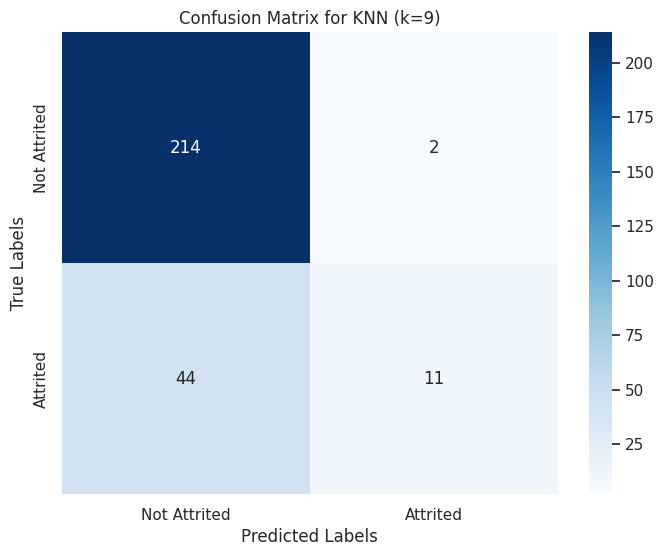

In [20]:
conf_matrix = confusion_matrix(y_test, y_best_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Attrited', 'Attrited'], yticklabels=['Not Attrited', 'Attrited'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix for KNN (k={bestk})")
plt.show()

## Evaluation (30 points)
In this part, we are going to evaluate your model's performance on another set of unseen data. Load test.csv (this data is already encoded), use your best_custom_model to predict and save the results in a DataFrame called 'result.csv'. The DataFrame should contain one column called 'target' that contains your model's predictions.

In [21]:
# Load test.csv
eval_df= pd.read_csv('test.csv')

X_eval = scaler.transform(eval_df)
y_pred_eval = Best_custom_model.predict(X_eval)

Save the results in a DataFrame

In [22]:
# Save the results as a csv file
result_df= pd.DataFrame()
result_df['target']=pd.Series(y_pred_eval)
result_df.to_csv('result.csv', index= False)

# Random Forest Model (12 points)

Implement a random forest model using sklearn.

In [23]:
# TODO: Implement the Random Forest model
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV with Random Forest
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)

rf_cv.fit(X_train, y_train)

best_rf = rf_cv.best_estimator_
y_pred_rf = best_rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.83

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       216
           1       0.78      0.25      0.38        55

    accuracy                           0.83       271
   macro avg       0.81      0.62      0.64       271
weighted avg       0.83      0.83      0.80       271



Visualize the confusion matrix for Random Forest predictions

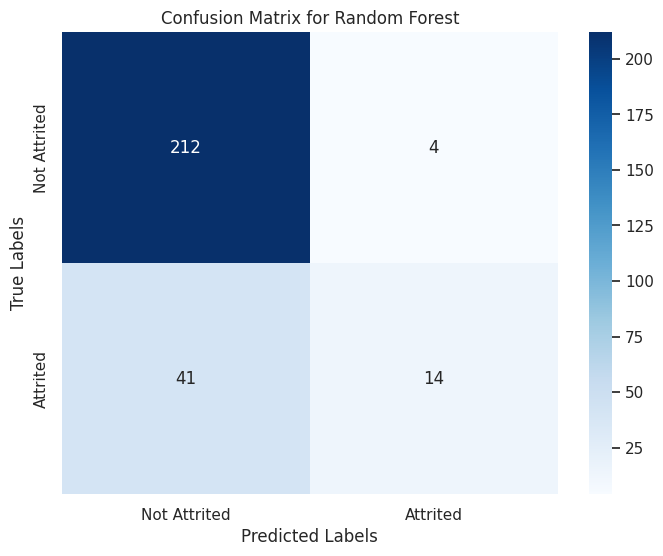

In [24]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Attrited', 'Attrited'],
            yticklabels=['Not Attrited', 'Attrited'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

A feature importance plot is a visual representation that illustrates the significance of each feature (or variable) in a machine learning model, particularly in the context of supervised learning tasks like classification and regression. Plot the feature importances using a bar plot.

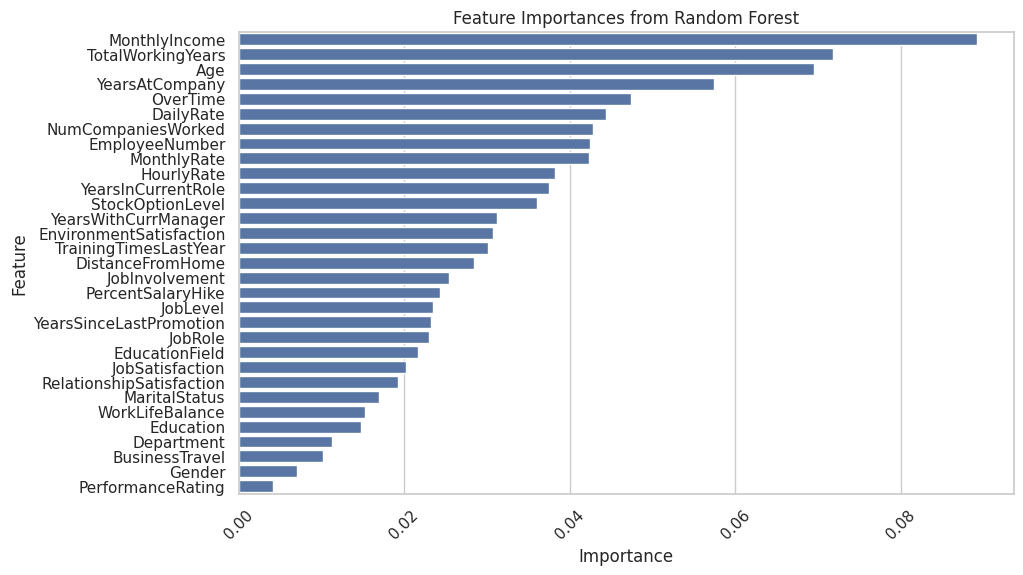

In [25]:
# Get the feature importances from the trained Random Forest model
importances= best_rf.feature_importances_

indices = np.argsort(importances)[::-1]
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features[indices],
    'Importance': importances[indices]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importances from Random Forest")
plt.tick_params(axis='x', rotation=45)
plt.show()

# Bagging with KNN (12 points)

In [26]:
# TODO: Implement Bagging with KNN
# Use BaggingClassifier with KNeighborsClassifier as the base estimator
# Here we use the bestk value we found before

bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=bestk), n_estimators=50, random_state=42)

bagging_knn.fit(X_train, y_train)

y_pred_bagging_knn = bagging_knn.predict(X_test)

bagging_knn_accuracy = accuracy_score(y_test, y_pred_bagging_knn)
print(f'Bagging KNN Accuracy: {bagging_knn_accuracy:.2f}')
print("\nBagging KNN Classification Report:")
print(classification_report(y_test, y_pred_bagging_knn))

Bagging KNN Accuracy: 0.83

Bagging KNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       216
           1       0.90      0.16      0.28        55

    accuracy                           0.83       271
   macro avg       0.86      0.58      0.59       271
weighted avg       0.84      0.83      0.77       271



Visualize the confusion matrix for Baggin KNN predictions

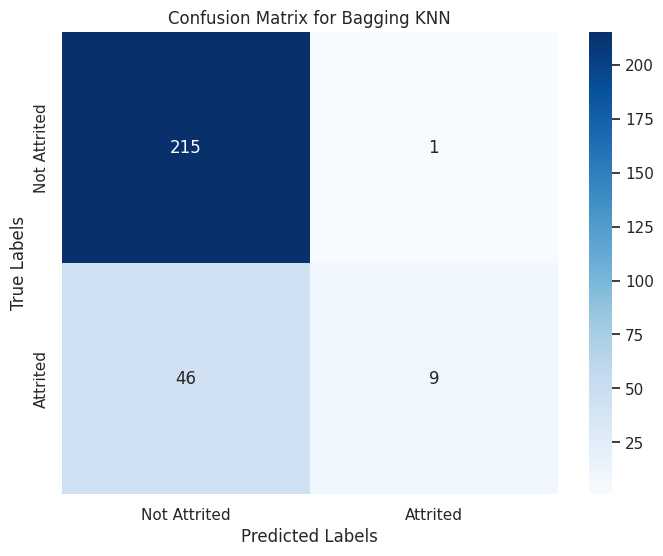

In [27]:
conf_matrix_bagging_knn = confusion_matrix(y_test, y_pred_bagging_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bagging_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Attrited', 'Attrited'],
            yticklabels=['Not Attrited', 'Attrited'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Bagging KNN")
plt.show()

# AdaBoost Model (12 points)

In [28]:
# TODO: Implement AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# GridSearchCV with AdaBoost
adaboost_cv = GridSearchCV(adaboost, param_grid_ada, cv=5)

adaboost_cv.fit(X_train, y_train)

y_pred_adaboost = adaboost_cv.best_estimator_.predict(X_test)

adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
print(f'AdaBoost Accuracy: {adaboost_accuracy:.2f}')
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost Accuracy: 0.83

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.90       216
           1       0.81      0.24      0.37        55

    accuracy                           0.83       271
   macro avg       0.82      0.61      0.64       271
weighted avg       0.83      0.83      0.80       271



Visualize the confusion matrix for AdaBoost predictions

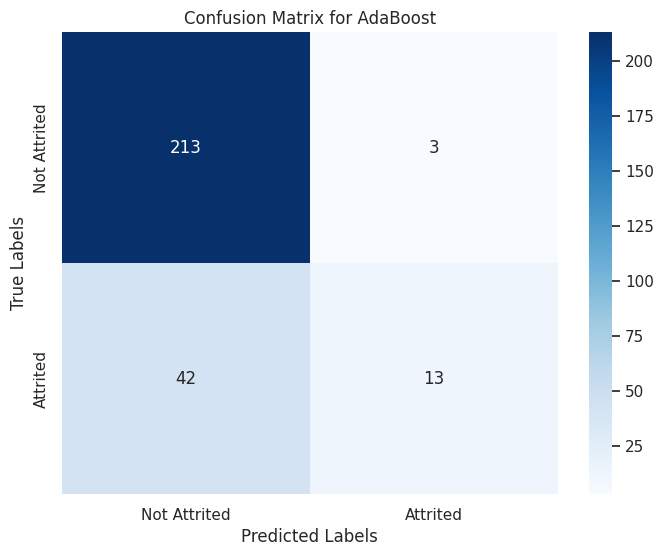

In [29]:
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Attrited', 'Attrited'],
            yticklabels=['Not Attrited', 'Attrited'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for AdaBoost")
plt.show()

# Model Comparison (4 points)

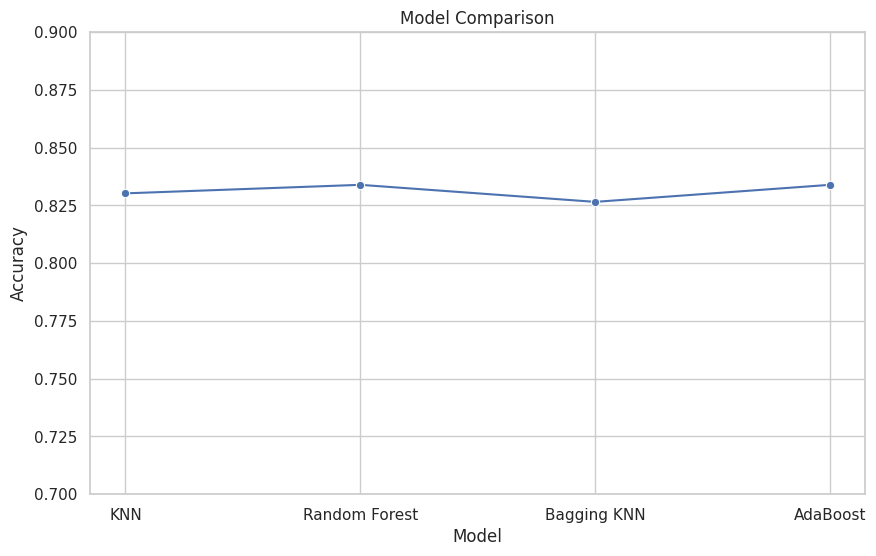

In [33]:
model_names = ['KNN', 'Random Forest', 'Bagging KNN', 'AdaBoost']
model_accuracies = [best_accuracy, rf_accuracy, bagging_knn_accuracy, adaboost_accuracy]
comparison_df = pd.DataFrame({'Model': model_names, 'Accuracy': model_accuracies})

plt.figure(figsize=(10, 6))
sns.lineplot(data=comparison_df, x='Model', y='Accuracy', marker='o')
plt.title('Model Comparison')
plt.ylim(0.7, 0.9)
plt.ylabel('Accuracy')
plt.show()